<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 47107, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 16.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [2]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 6.8 MB 52.1 MB/s 
     |████████████████████████████████| 981 kB 52.3 MB/s 
     |████████████████████████████████| 263 kB 90.6 MB/s 
     |████████████████████████████████| 2.8 MB 60.0 MB/s 
     |████████████████████████████████| 1.2 MB 48.9 MB/s 
     |████████████████████████████████| 468 kB 69.6 MB/s 
     |████████████████████████████████| 3.3 MB 59.4 MB/s 
     |████████████████████████████████| 895 kB 64.9 MB/s 
     |████████████████████████████████| 596 kB 69.7 MB/s 
     |████████████████████████████████| 61 kB 503 kB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=eb544d62ca5f28017bb853d757f0a70a962811f0abbda8e5565ccb5d827d1108
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=b3f6725152456225

In [4]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vs

In [6]:
import re

pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p = re.compile(pattern)
r = p.search('10_0_0_20170110220546177.jpg')
r.group(1)

'10'

In [8]:
DATADIR = '/content/Image-Dataset-for-Age-Prediction/images'

In [9]:
(train_data, test_data, preproc) = vs.images_from_fname(DATADIR, pattern=pattern, is_regression=True, random_state=42)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-

['label']
       label
12304   39.0
6161    18.0
19807   27.0
21202    1.0
14941   96.0
['label']
       label
16139    1.0
14926    1.0
8979    45.0
12077   20.0
14568   13.0
Found 21690 validated image filenames.
Found 2411 validated image filenames.


In [10]:
vs.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [11]:
model = vs.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94781440/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [12]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size=64)

In [13]:
# Learning rate = 1e-4

learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 2919s 9s/step - loss: 395.7562 - mae: 14.7667 - val_loss: 178.1747 - val_mae: 10.1750
Epoch 2/2
339/339 [==============================] - 3058s 9s/step - loss: 175.1949 - mae: 10.1198 - val_loss: 157.9400 - val_mae: 9.6169


In [ ]:
learner.freeze(15)

learner.fit_onecycle(1e-4, 2)

In [14]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [15]:
test_data.filenames[10:20]

['12_1_0_20170102234319611.jpg',
 '5_1_2_20161219200132701.jpg',
 '40_1_1_20170113001812259.jpg',
 '25_0_4_20170117193004258.jpg',
 '54_0_2_20170117171429994.jpg',
 '2_0_0_20170110212852343.jpg',
 '8_1_3_20161220222820773.jpg',
 '21_0_1_20170113133117587.jpg',
 '35_0_0_20170116233057278.jpg',
 '7_0_0_20170110215612275.jpg']

In [18]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vs.show_image(fname)
  print('Predicted age: %s | Actual age: %s' % (pred, actual))

Predicted age: 16 | Actual age: 2


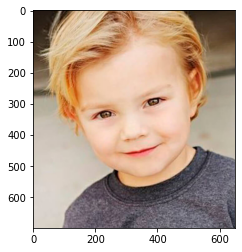

In [20]:
show_prediction('2_0_0_20170110212852343.jpg')

In [32]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vs.show_image(fname)
  print('Predicted age: %s' % pred)

In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [34]:
predictor.save('age_detection')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [35]:
!zip -r age_predictor.zip age_detection

  adding: age_detection/ (stored 0%)
  adding: age_detection/tf_model.h5 (deflated 8%)
  adding: age_detection/tf_model.preproc (deflated 41%)
